In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('mpg')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
print("Shape of dataset:", df.shape)
print("\nData Info:\n")
df.info()

# Summary statistics
df.describe(include='all')


Shape of dataset: (398, 9)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [3]:
# Missing values
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
print("\nMissing Values:\n", missing)

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())



Missing Values:
               missing_count  missing_percent
mpg                       0         0.000000
cylinders                 0         0.000000
displacement              0         0.000000
horsepower                6         1.507538
weight                    0         0.000000
acceleration              0         0.000000
model_year                0         0.000000
origin                    0         0.000000
name                      0         0.000000

Duplicate rows: 0


In [4]:
# Fill missing numeric values with median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Drop rows with missing origin or name if any
df.dropna(subset=['origin', 'name'], inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum().sum())



Missing values after cleaning:
 0


In [5]:
# Convert 'origin' and 'model_year' to categorical
df['origin'] = df['origin'].astype('category')
df['model_year'] = df['model_year'].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.4+ KB


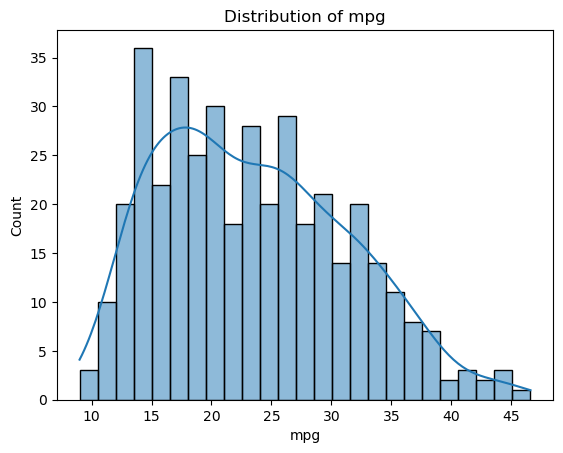

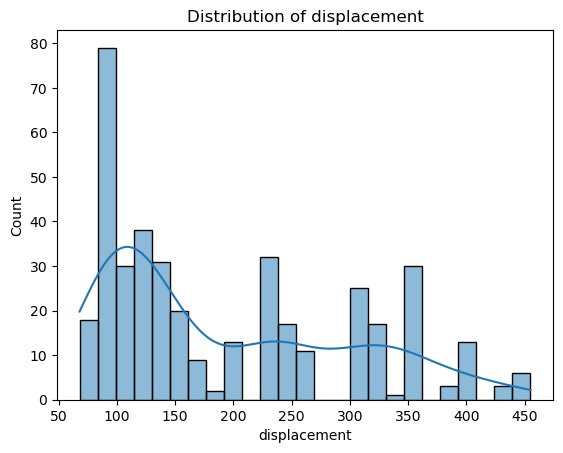

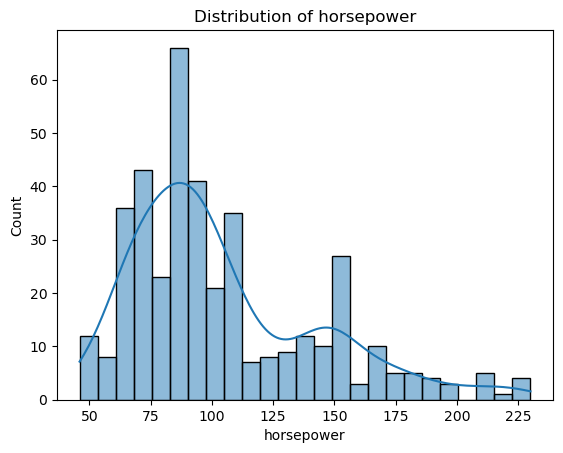

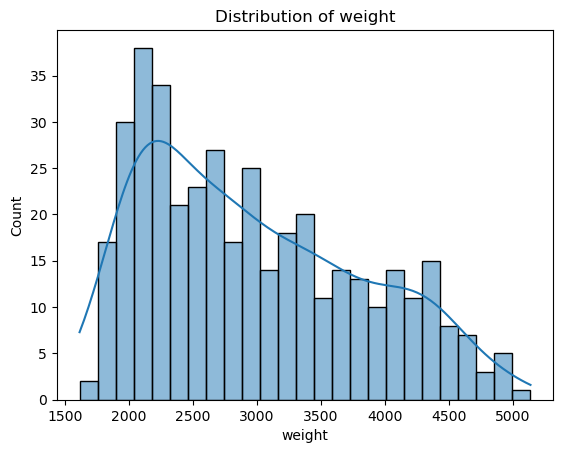

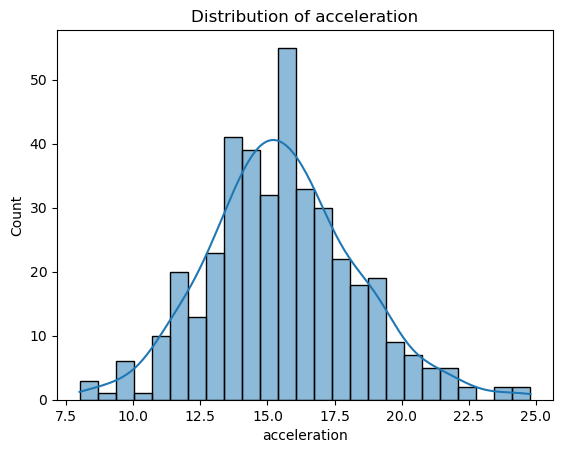

In [6]:
num_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in num_cols:
    sns.histplot(df[col], bins=25, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


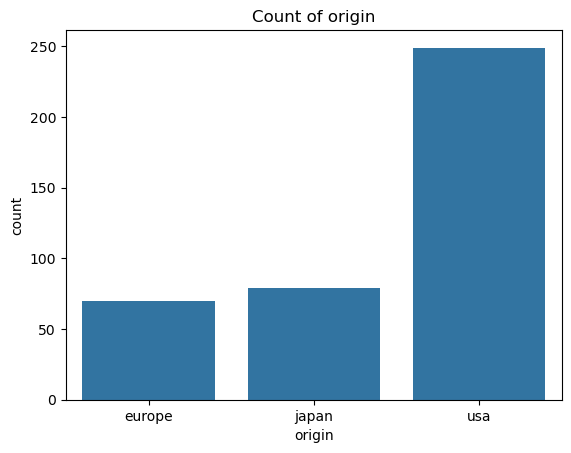

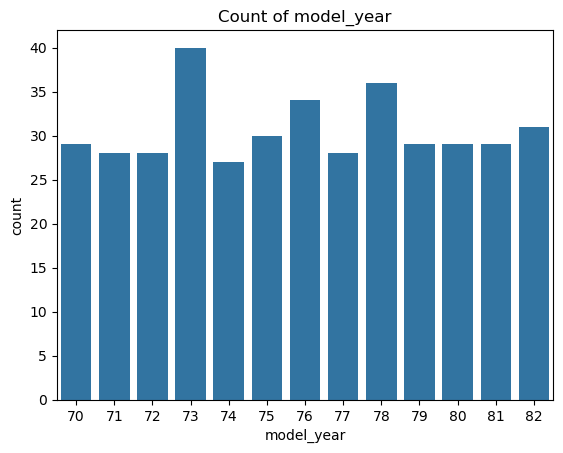

In [7]:
cat_cols = ['origin', 'model_year']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()


Outliers in mpg: 1


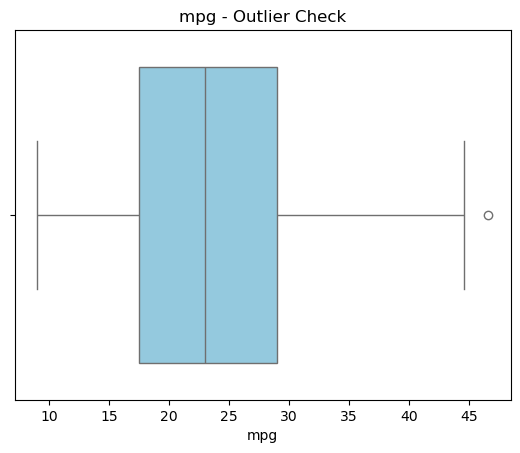

Outliers in displacement: 0


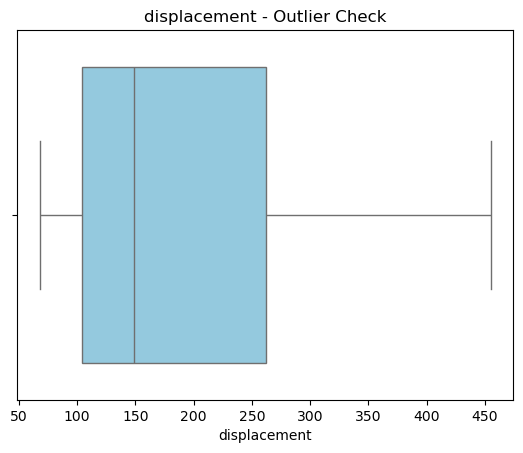

Outliers in horsepower: 11


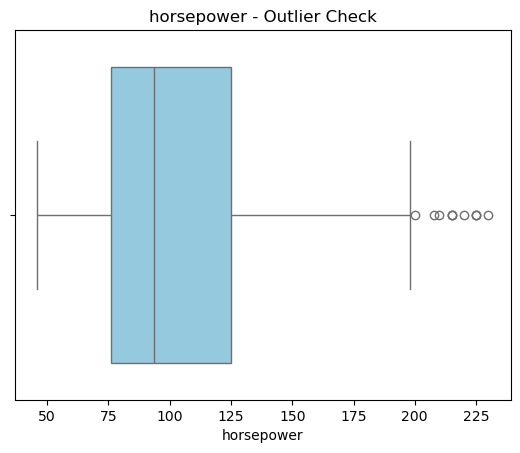

Outliers in weight: 0


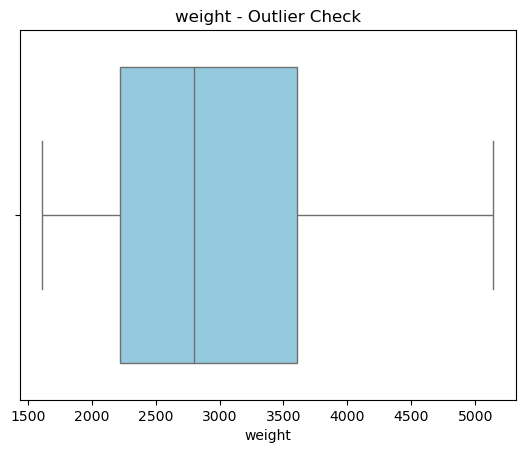

Outliers in acceleration: 7


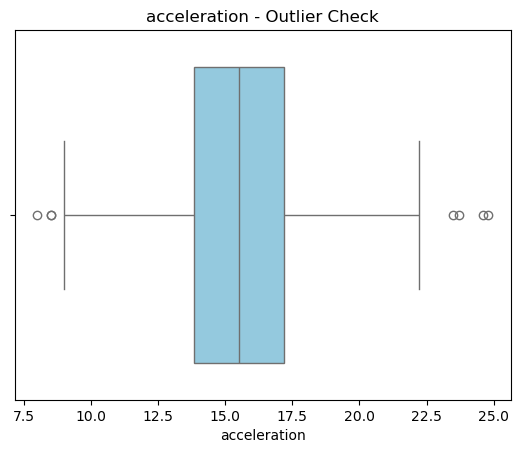

In [8]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {len(outliers)}")

    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col} - Outlier Check")
    plt.show()


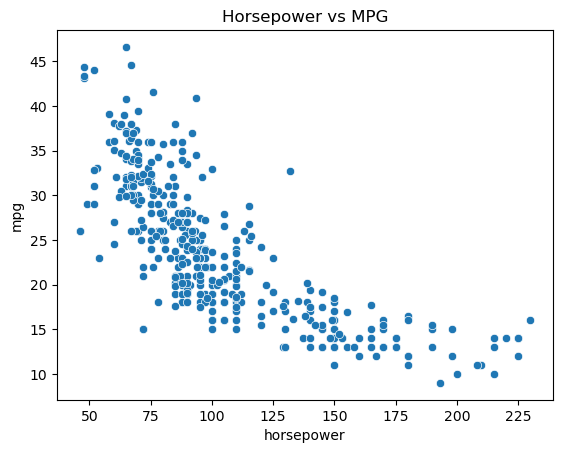

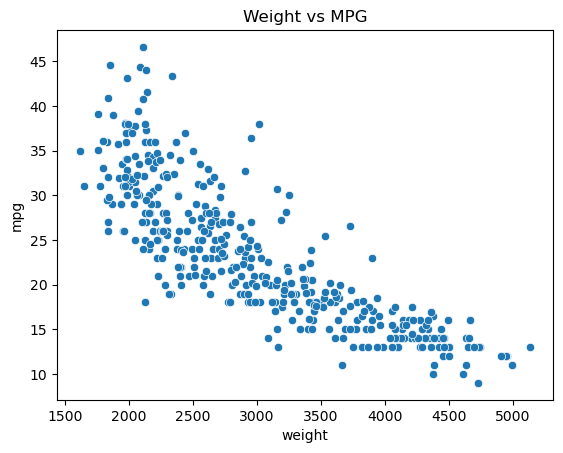

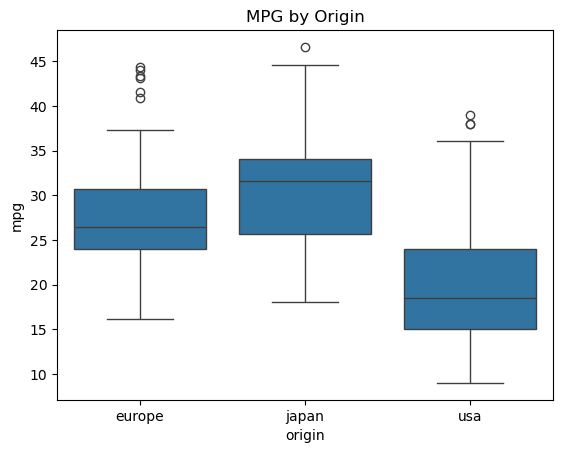

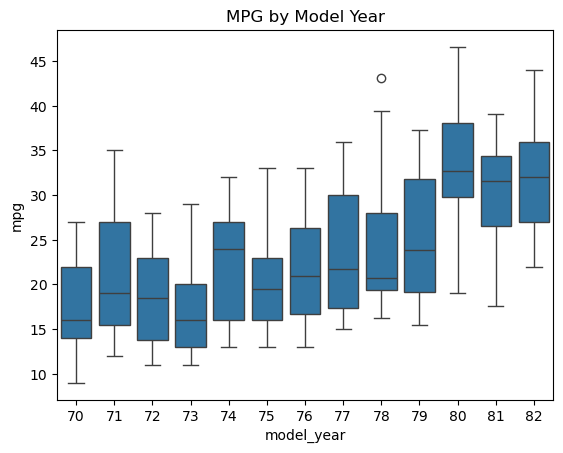

In [9]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title("Horsepower vs MPG")
plt.show()

sns.scatterplot(x='weight', y='mpg', data=df)
plt.title("Weight vs MPG")
plt.show()

sns.boxplot(x='origin', y='mpg', data=df)
plt.title("MPG by Origin")
plt.show()

sns.boxplot(x='model_year', y='mpg', data=df)
plt.title("MPG by Model Year")
plt.show()


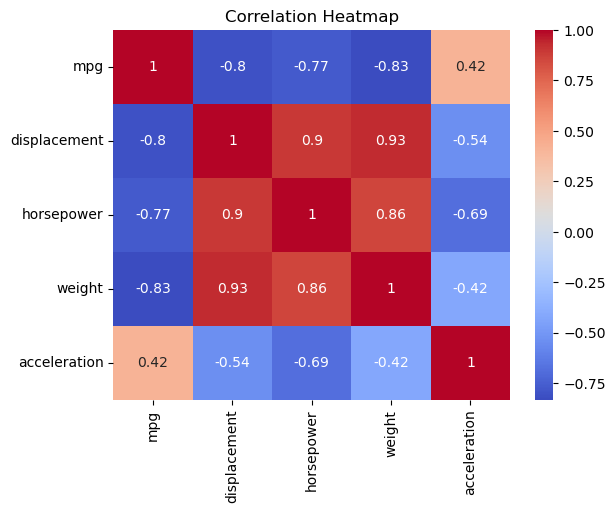

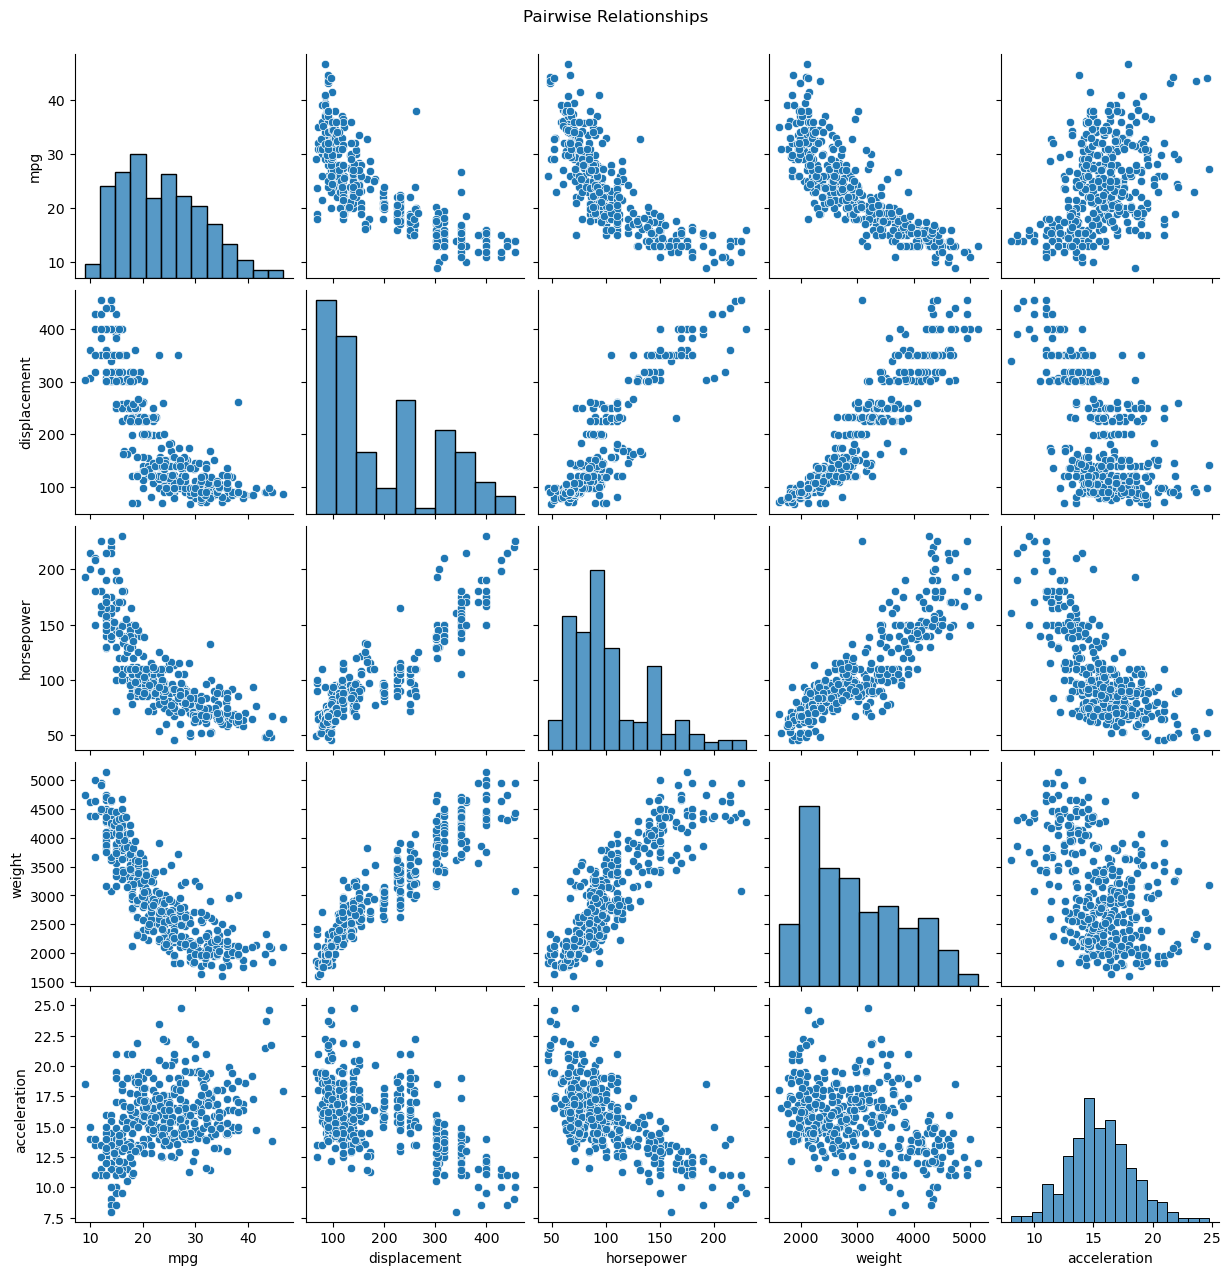

In [10]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[num_cols])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


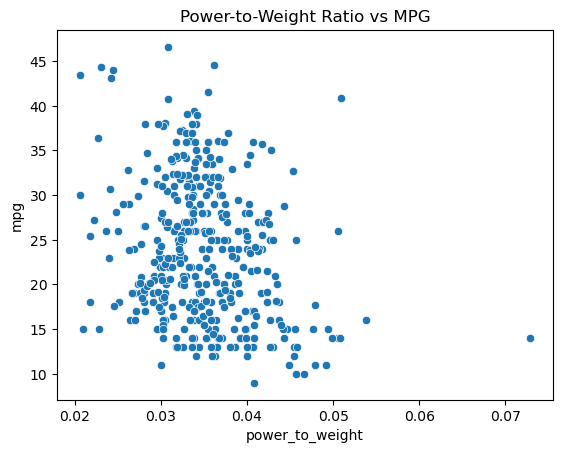

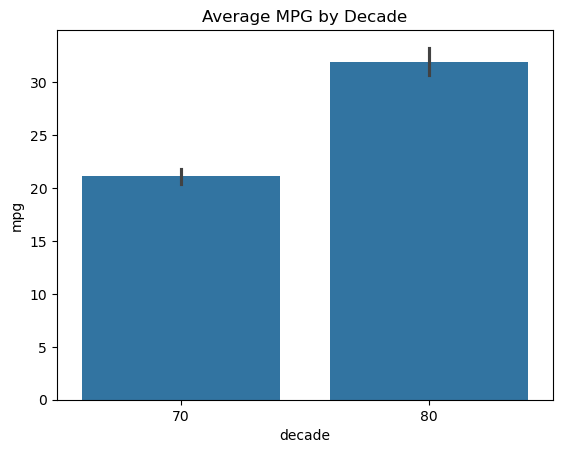

,mpg,horsepower,weight,power_to_weight,decade
0,18.0,130.0,3504,0.037100,70
1,15.0,165.0,3693,0.044679,70
2,18.0,150.0,3436,0.043655,70
3,16.0,150.0,3433,0.043694,70
4,17.0,140.0,3449,0.040591,70


In [11]:
# Feature: Power-to-weight ratio
df['power_to_weight'] = df['horsepower'] / df['weight']

# Feature: Decade (to see fuel efficiency trends)
df['decade'] = (df['model_year'].astype(int) // 10) * 10

sns.scatterplot(x='power_to_weight', y='mpg', data=df)
plt.title("Power-to-Weight Ratio vs MPG")
plt.show()

sns.barplot(x='decade', y='mpg', data=df)
plt.title("Average MPG by Decade")
plt.show()

df[['mpg', 'horsepower', 'weight', 'power_to_weight', 'decade']].head()
